# IBM Q をpython API から使う
IBM Qをウェブブラウザー上で使うのは不便。とくに何回も量子コンピュータにjobを投げるような場合には特に不便。自動でjobを投げれるような API (application programing interface:アプリケーションプログラミングインターフェイス）が用意されている。

参照：qiskidのgithub
https://github.com/QISKit/qiskit-api-py

APIトークン（IBMQのアカウントの認証のようなもの）をインポートする。Qconfig.pyのなかに、自分のアカウントから生成したトークンをコピペする。このトークンが人に知られるとアカウントが使えるてしまうので注意する。

（ステップ1）APIを使うためにモジュールをインポート

```
pip install IBMquantumExperience
```

（ステップ２）このjupyter notebookと同じフォルダに Qconfig.py, Qconfig.pycを置く

（ステップ３）IBM Qのサイトに行ってログンイン、右上にある My Account -> Advanced -< API token

（ステップ４）Qconfig.pyを開いて、
```
APItoken = "ここにAPIトークンをいれる"
```
にAPI Token の文字列を入れる。もしくは、直接 APItokenのところに書き込む。

In [1]:
import matplotlib.pyplot as plt
import scipy.optimize
import math
import scipy.linalg
from scipy import linalg
from scipy.linalg import expm
import numpy as np
import sys

IBMQuantumExperienceのモジュールをインポート

In [2]:
from IBMQuantumExperience import IBMQuantumExperience
import IBMQuantumExperience

In [3]:
#import Qconfig
#api = IBMQuantumExperience.IBMQuantumExperience(Qconfig.APItoken, Qconfig.config)
# Qconfig.pyファイルを編集するか以下の関数に直接トークンを書き込んでください。

api = IBMQuantumExperience.IBMQuantumExperience("ここにAPItokenを書く",{"url": 'https://quantumexperience.ng.bluemix.net/api'})

ユニット数がわかる

In [4]:
api.get_my_credits()

{'maxUserType': 150, 'promotional': 0, 'remaining': 150}

デバイスのステータスを見る

In [5]:
api.backend_status("ibmqx2")

BadBackendError: Could not find backend "ibmqx2" available.

In [6]:
api.backend_status("ibmqx4")

{'available': True, 'backend': 'ibmqx4', 'pending_jobs': 71}

In [7]:
api.backend_status("ibmqx5")

BadBackendError: Could not find backend "ibmqx5" available.

In [10]:
api.available_backends()

[{'basisGates': 'u1,u2,u3,cx,id',
  'chipName': 'Raven',
  'couplingMap': [[1, 0], [2, 0], [2, 1], [3, 2], [3, 4], [4, 2]],
  'description': '5 qubit transmon bowtie chip 3',
  'gateSet': 'SU2+CNOT',
  'id': '5ae875670f020500393162b3',
  'nQubits': 5,
  'name': 'ibmqx4',
  'onlineDate': '2017-09-18T00:00:00.000Z',
  'serialNumber': 'ibmqx4',
  'simulator': False,
  'status': 'on',
  'topologyId': '5ae875640f02050039315bf8',
  'url': 'https://ibm.biz/qiskit-ibmqx4',
  'version': '1.2.0'},
 {'basisGates': 'u1,u2,u3,cx,id',
  'chipName': 'Albatross',
  'couplingMap': [[1, 0],
   [1, 2],
   [2, 3],
   [3, 4],
   [3, 14],
   [5, 4],
   [6, 5],
   [6, 7],
   [6, 11],
   [7, 10],
   [8, 7],
   [9, 8],
   [9, 10],
   [11, 10],
   [12, 5],
   [12, 11],
   [12, 13],
   [13, 4],
   [13, 14],
   [15, 0],
   [15, 2],
   [15, 14]],
  'description': '16 transmon 2x8 ladder',
  'gateSet': 'SU2+CNOT',
  'id': '5ae875670f020500393162b6',
  'nQubits': 16,
  'name': 'ibmqx5',
  'onlineDate': '2017-09-21T0

OpenQASM形式で量子回路をテキストとして書き出す。IBMQのウェブブラウザーからopenQASM形式の記述を学ぼう。

In [15]:
#好きな名前のテキストを作る
qcircuit =[{ 'qasm': 'OPENQASM 2.0;\n'
"""
include "qelib1.inc";
qreg q[5];
creg c[5];

h q[0];
t q[0];
h q[0];

measure q[0] -> c[0];
"""
           }]

api.run_job(回路テキスト名、使うデバイス、サンプル数、ユニット数）
でjobを投げる。

In [16]:
backend = 'ibmqx4'
response = api.run_job(qcircuit, backend ,shots = 8192, max_credits = 5)
print(response)

{'qasms': [{'qasm': '\n\ninclude "qelib1.inc";\nqreg q[5];\ncreg c[5];\n\nh q[0];\nt q[0];\nh q[0];\n\nmeasure q[0] -> c[0];\n', 'status': 'WORKING_IN_PROGRESS', 'executionId': '5bd7a52465cefa003edf735e'}], 'shots': 8192, 'backend': {'id': '5ae875670f020500393162b3', 'name': 'ibmqx4'}, 'status': 'RUNNING', 'maxCredits': 5, 'usedCredits': 5, 'creationDate': '2018-10-30T00:26:12.290Z', 'deleted': False, 'id': '5bd7a52465cefa003edf735d', 'userId': '5ae8748c0f02050039314f73', 'infoQueue': {'status': 'PENDING_IN_QUEUE', 'position': 1}}


idを取得する。responseの中の id 要素を参照する。

In [18]:
id = response["id"]
print(id)

5bd7a52465cefa003edf735d


対応する id の状況を取得する。

In [27]:
api.get_job(id)

{'backend': {'id': '5ae875670f020500393162b3', 'name': 'ibmqx4'},
 'calibration': {'fridgeParameters': {'Temperature': {'date': '-',
    'unit': '-',
    'value': []},
   'cooldownDate': '2017-09-07'},
  'lastUpdateDate': '2018-10-29T09:59:34.000Z',
  'multiQubitGates': [{'gateError': {'date': '2018-10-29T09:59:34Z',
     'value': 0.02799624518850735},
    'name': 'CX1_0',
    'qubits': [1, 0],
    'type': 'CX'},
   {'gateError': {'date': '2018-10-29T09:59:34Z',
     'value': 0.023992922342067957},
    'name': 'CX2_0',
    'qubits': [2, 0],
    'type': 'CX'},
   {'gateError': {'date': '2018-10-29T09:59:34Z',
     'value': 0.03323768063574395},
    'name': 'CX2_1',
    'qubits': [2, 1],
    'type': 'CX'},
   {'gateError': {'date': '2018-10-29T09:59:34Z',
     'value': 0.05696233200548076},
    'name': 'CX3_2',
    'qubits': [3, 2],
    'type': 'CX'},
   {'gateError': {'date': '2018-10-29T09:59:34Z',
     'value': 0.03986794098301716},
    'name': 'CX3_4',
    'qubits': [3, 4],
    'type

jobが遂行されたか "status"を確認する。

In [28]:
api.get_job(id)["status"]

'COMPLETED'

In [35]:
result_data = api.get_job(id)["qasms"][0]["data"]["counts"]
print(result_data)

{'00000': 6966, '00001': 1226}


In [31]:
tmp_result["data"]

{'counts': {'00000': 6966, '00001': 1226},
 'date': '2018-10-30T00:32:22.705Z',
 'time': 68.99961614608765}

In [22]:
tmp_result = tmp_result["data"]["counts"]

In [23]:
tmp_result["00000"]

6950

In [24]:
tmp_result["00001"]

1242

In [44]:
def get_result():
    backend = 'ibmq_qasm_simulator'
    #backend = 'ibmqx2'
    #backend = 'ibmqx4'
    
    #jobを投げる
    response = api.run_job(qcircuit, backend ,shots = 8192, max_credits = 15) 
    #print(response)

    #id を取得する
    id = response["id"]
    
    #resulttmpに情報を格納する
    resulttmp = api.get_job(id)
    
    #'RUNNING'担っている間ずっと問い合わせる
    while(resulttmp["status"]=='RUNNING'):
        import time
        time.sleep(10)
        resulttmp = api.get_job(id)
        print("request...{}, return {}".format(id,resulttmp["status"]))
    
    #'RUNNING'が終わると get_jobの値を返す
    return resulttmp

In [42]:
get_result()

{'qasms': [{'qasm': '\n\ninclude "qelib1.inc";\nqreg q[5];\ncreg c[5];\n\nh q[0];\nt q[0];\nh q[0];\n\nmeasure q[0] -> c[0];\n', 'status': 'WORKING_IN_PROGRESS', 'executionId': '5bd7ab121bf7450056cd00a8'}], 'shots': 8192, 'backend': {'name': 'ibmq_qasm_simulator'}, 'status': 'RUNNING', 'maxCredits': 15, 'usedCredits': 0, 'creationDate': '2018-10-30T00:51:30.822Z', 'deleted': False, 'id': '5bd7ab121bf7450056cd00a7', 'userId': '5ae8748c0f02050039314f73'}
request...5bd7ab121bf7450056cd00a7, return COMPLETED


{'backend': {'name': 'ibmq_qasm_simulator'},
 'calibration': {},
 'creationDate': '2018-10-30T00:51:30.822Z',
 'deleted': False,
 'id': '5bd7ab121bf7450056cd00a7',
 'maxCredits': 15,
 'qasms': [{'data': {'additionalData': {'seed': 820179956},
    'counts': {'00000': 7011, '00001': 1181},
    'creg_labels': 'c[5]',
    'date': '2018-10-30T00:51:31.395Z',
    'time': 0.040624,
    'versionSimulationRun': 'IBM_Q_Simulator:CPU-v0.1.b5cdd73\n'},
   'executionId': '5bd7ab121bf7450056cd00a8',
   'qasm': '\n\ninclude "qelib1.inc";\nqreg q[5];\ncreg c[5];\n\nh q[0];\nt q[0];\nh q[0];\n\nmeasure q[0] -> c[0];\n',
   'status': 'DONE'}],
 'shots': 8192,
 'status': 'COMPLETED',
 'usedCredits': 0,
 'userId': '5ae8748c0f02050039314f73'}

まとめて、最後のほしいデータまでを計算するようなコードを書く。

{'qasms': [{'qasm': '\n\ninclude "qelib1.inc";\nqreg q[5];\ncreg c[5];\n\nh q[0];\nt q[0];\nh q[0];\n\nmeasure q[0] -> c[0];\n', 'status': 'WORKING_IN_PROGRESS', 'executionId': '5b179d426d9f4e003b8be3cc'}], 'shots': 8192, 'backend': {'name': 'ibmq_qasm_simulator'}, 'status': 'RUNNING', 'maxCredits': 15, 'usedCredits': 0, 'creationDate': '2018-06-06T08:37:22.287Z', 'id': '5b179d426d9f4e003b8be3cb', 'userId': '5ae8748c0f02050039314f73'}
0.8515625 0.1484375


<Container object of 2 artists>

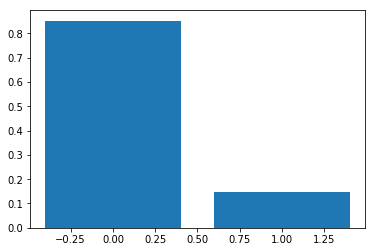

In [20]:
result = get_result()
num_sample = result["shots"]
prob0 = 1.0* result["qasms"][0]["data"]["counts"]["00000"]/num_sample
prob1 = 1.0* result["qasms"][0]["data"]["counts"]["00001"]/num_sample

print(prob0,prob1)
plt.bar([0,1],[prob0,prob1])

うまく動くことが確認できたら実機で実行しよう。

{'qasms': [{'qasm': '\n\ninclude "qelib1.inc";\nqreg q[5];\ncreg c[5];\n\nh q[0];\nt q[0];\nh q[0];\n\nmeasure q[0] -> c[0];\n', 'status': 'WORKING_IN_PROGRESS', 'executionId': '5b1795eb0f2025003866d046'}], 'shots': 8192, 'backend': {'id': '5ae875670f020500393162b3', 'name': 'ibmqx4'}, 'status': 'RUNNING', 'maxCredits': 15, 'usedCredits': 5, 'creationDate': '2018-06-06T08:06:02.623Z', 'id': '5b1795eb0f2025003866d045', 'userId': '5ae8748c0f02050039314f73', 'infoQueue': {'status': 'FINISHED'}}
request...5b1795eb0f2025003866d045, return RUNNING
request...5b1795eb0f2025003866d045, return RUNNING
request...5b1795eb0f2025003866d045, return RUNNING
request...5b1795eb0f2025003866d045, return RUNNING
request...5b1795eb0f2025003866d045, return RUNNING
request...5b1795eb0f2025003866d045, return RUNNING
request...5b1795eb0f2025003866d045, return COMPLETED
0.8526611328125 0.1473388671875


<Container object of 2 artists>

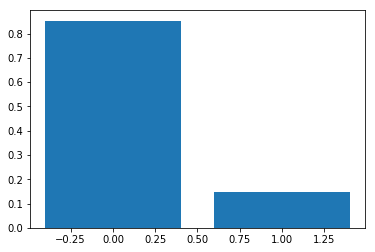

In [33]:
qcircuit =[{ 'qasm': 'OPENQASM 2.0;\n'
"""
include "qelib1.inc";
qreg q[5];
creg c[5];

h q[0];
t q[0];
h q[0];

measure q[0] -> c[0];
"""
           }]
result = get_result()
num_sample = result["shots"]
prob0 = 1.0* result["qasms"][0]["data"]["counts"]["00000"]/num_sample
prob1 = 1.0* result["qasms"][0]["data"]["counts"]["00001"]/num_sample

print(prob0,prob1)
plt.bar([0,1],[prob0,prob1])

request...5bd7b56d83633700626f604a, return COMPLETED
request...5bd7b57ff39f7900431653dc, return COMPLETED
request...5bd7b593f9ace70055959a87, return COMPLETED
request...5bd7b5a2cf6a040060917327, return COMPLETED
request...5bd7b5b284c92c006256904b, return COMPLETED
request...5bd7b5c11896af0062f010aa, return COMPLETED
request...5bd7b5cf7edb46005de35807, return COMPLETED
request...5bd7b5ddf9ace70055959a89, return COMPLETED
request...5bd7b5ec84c92c006256904d, return COMPLETED
request...5bd7b5fc2dbb8d0052dc0a3e, return COMPLETED
request...5bd7b60c53b38800643435ed, return COMPLETED
request...5bd7b61b84c92c006256904f, return COMPLETED
request...5bd7b629185c31005d5147c4, return COMPLETED
request...5bd7b6394c57c900659fd652, return COMPLETED
request...5bd7b64cf39f7900431653e0, return COMPLETED
request...5bd7b65b185c31005d5147c6, return COMPLETED
request...5bd7b66a1385fe0052b9dcdb, return COMPLETED
request...5bd7b67998b5d90053f0e159, return COMPLETED


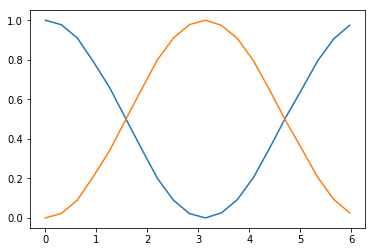

In [73]:
prob0 = []
prob1 = []
angle =[]


for i in range(20):
    qcircuit_orig = """
include "qelib1.inc";
qreg q[5];
creg c[5];

h q[0];
u1(phi) q[0];
h q[0];

measure q[0] -> c[0];
"""
    
    phi = 2.0*np.pi*i/20
    angle.append(phi)
    qcircuit = qcircuit_orig.replace("phi","{0:f}".format(phi))
    qcircuit = [{'qasm':qcircuit}]
    #print(qcircuit)

    
    result = get_result()
    num_sample = result["shots"]
    #print(result)
    if("00000" in result["qasms"][0]["data"]["counts"]):
        prob0.append(1.0* result["qasms"][0]["data"]["counts"]["00000"]/num_sample)
    else:
        prob0.append(0)
    if("00001" in result["qasms"][0]["data"]["counts"]):
        prob1.append(1.0* result["qasms"][0]["data"]["counts"]["00001"]/num_sample)
    else:
        prob1.append(0)

#print(prob0,prob1)
plt.plot(angle,prob0)
plt.plot(angle,prob1)
plt.show()

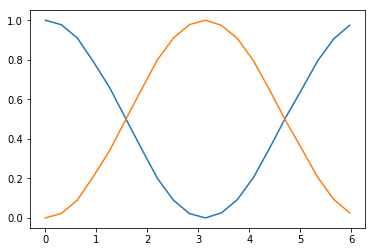

In [74]:
plt.plot(angle,prob0)
plt.plot(angle,prob1)
plt.show()


In [70]:
angle

[0.0,
 0.6283185307179586,
 1.2566370614359172,
 1.8849555921538759,
 2.5132741228718345,
 3.141592653589793,
 3.7699111843077517,
 4.39822971502571,
 5.026548245743669,
 5.654866776461628,
 6.283185307179586,
 6.911503837897544,
 7.5398223686155035,
 8.168140899333462,
 8.79645943005142,
 9.42477796076938,
 10.053096491487338,
 10.681415022205297,
 11.309733552923255,
 11.938052083641214]

6量子ビットをsimulator上で使う。

In [10]:
qcircuit =[{ 'qasm': 'OPENQASM 2.0;\n'
"""
include "qelib1.inc";
qreg q[6];
creg c[6];

h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
t q[5];


measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];
measure q[5] -> c[5];
"""
           }]

def get_result_simulator():
    backend = 'ibmq_qasm_simulator'
    #backend = 'ibmqx2'
    #backend = 'ibmqx4'
    
    #jobを投げる
    response = api.run_job(qcircuit, backend ,shots = 8192, max_credits = 15) 
    print(response)

    #id を取得する
    id = response["id"]
    
    #resulttmpに情報を格納する
    resulttmp = api.get_job(id)
    
    #'RUNNING'担っている間ずっと問い合わせる
    while(resulttmp["status"]=='RUNNING'):
        import time
        time.sleep(1)
        resulttmp = api.get_job(id)
        print("request...{}, return {}".format(id,resulttmp["status"]))
    
    #'RUNNING'が終わると get_jobの値を返す
    #print(resulttmp)
    return resulttmp

In [22]:
result = get_result_simulator();

{'qasms': [{'qasm': '\n\ninclude "qelib1.inc";\nqreg q[6];\ncreg c[6];\n\nh q[0];\nh q[1];\nh q[2];\nh q[3];\nh q[4];\nt q[5];\n\n\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\nmeasure q[2] -> c[2];\nmeasure q[3] -> c[3];\nmeasure q[4] -> c[4];\nmeasure q[5] -> c[5];\n', 'status': 'WORKING_IN_PROGRESS', 'executionId': '5b17a32b18fd2d0042e784f7'}], 'shots': 8192, 'backend': {'name': 'ibmq_qasm_simulator'}, 'status': 'RUNNING', 'maxCredits': 15, 'usedCredits': 0, 'creationDate': '2018-06-06T09:02:35.725Z', 'id': '5b17a32b18fd2d0042e784f6', 'userId': '5ae8748c0f02050039314f73'}


In [23]:
result

{'backend': {'name': 'ibmq_qasm_simulator'},
 'calibration': {},
 'creationDate': '2018-06-06T09:02:35.725Z',
 'id': '5b17a32b18fd2d0042e784f6',
 'maxCredits': 15,
 'qasms': [{'data': {'additionalData': {'seed': 145052512},
    'counts': {'000000': 250,
     '000001': 254,
     '000010': 267,
     '000011': 252,
     '000100': 249,
     '000101': 228,
     '000110': 221,
     '000111': 241,
     '001000': 261,
     '001001': 263,
     '001010': 274,
     '001011': 243,
     '001100': 252,
     '001101': 274,
     '001110': 265,
     '001111': 255,
     '010000': 259,
     '010001': 242,
     '010010': 264,
     '010011': 267,
     '010100': 241,
     '010101': 241,
     '010110': 247,
     '010111': 294,
     '011000': 267,
     '011001': 270,
     '011010': 239,
     '011011': 271,
     '011100': 247,
     '011101': 262,
     '011110': 282,
     '011111': 250},
    'creg_labels': 'c[6]',
    'date': '2018-06-06T09:02:36.262Z',
    'time': 0.277506},
   'executionId': '5b17a32b18fd2d00

量子体積のベンチマークをやる。量子体積のベンチマーク用回路は、https://github.com/Qiskit/openqasm/tree/master/benchmarks/quantum_volume 
にあるpythonコードから生成できます。

In [8]:
qcircuit =[{ 'qasm': 'OPENQASM 2.0;\n'
"""
include "qelib1.inc";
qreg q[5];
creg c[5];
u3(1.91152688683070,-1.21657226677740,-1.71729995818657) q[3];
u3(0.984462114291173,-4.56483779756320,1.10374302667038) q[4];
cx q[4],q[3];
u1(0.373521507303184) q[3];
u3(-0.914052199522678,0.0,0.0) q[4];
cx q[3],q[4];
u3(1.74680878376614,0.0,0.0) q[4];
cx q[4],q[3];
u3(2.18523190423970,0.825524926344838,0.662983333753341) q[3];
u3(1.28143585206458,0.930939695068206,1.73426464869259) q[4];
u3(2.88586790390374,4.18282066615206,-1.82089162928290) q[2];
u3(1.14235875081804,-1.18753451168476,1.87989639577665) q[1];
cx q[1],q[2];
u1(2.08701525236352) q[2];
u3(-2.94224444400052,0.0,0.0) q[1];
cx q[2],q[1];
u3(1.22466375019815,0.0,0.0) q[1];
cx q[1],q[2];
u3(2.74785917226328,1.22540748084369,-2.80746612765434) q[2];
u3(1.34773632191173,0.341880460380413,1.24459050746208) q[1];
u3(1.46564041991164,0.944360170325547,-0.00193433357494921) q[2];
u3(1.75368726712632,-1.05216464377506,-4.66517060268469) q[4];
cx q[4],q[2];
u1(3.07016400541415) q[2];
u3(-2.04821028424998,0.0,0.0) q[4];
cx q[2],q[4];
u3(1.31432863708158,0.0,0.0) q[4];
cx q[4],q[2];
u3(2.08784590137081,-2.37508279439776,3.07853053302422) q[2];
u3(3.06381933708470,-0.821004951948144,4.53650538971025) q[4];
u3(1.84370946587414,-1.10583839214538,-1.34756471548985) q[1];
u3(0.535699537434057,-4.82819398376637,0.128376862676408) q[0];
cx q[0],q[1];
u1(-0.0383481689750749) q[1];
u3(-2.52950713313019,0.0,0.0) q[0];
cx q[1],q[0];
u3(1.21809835915864,0.0,0.0) q[0];
cx q[0],q[1];
u3(0.977596733016533,-1.64584293537531,0.373249362880581) q[1];
u3(0.437514479056603,5.53696621733218,-0.499769386328959) q[0];
barrier q[0],q[1],q[2],q[3],q[4];
measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];
include "qelib1.inc";
qreg q[6];
creg c[6];

h q[0];
h q[1];
h q[2];
h q[3];
h q[4];
t q[5];


measure q[0] -> c[0];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];
measure q[5] -> c[5];
"""
}]

In [ ]:
ひとまず、simulator で計算してみる。

In [11]:
result = get_result_simulator();

{'qasms': [{'qasm': '\n\ninclude "qelib1.inc";\nqreg q[6];\ncreg c[6];\n\nh q[0];\nh q[1];\nh q[2];\nh q[3];\nh q[4];\nt q[5];\n\n\nmeasure q[0] -> c[0];\nmeasure q[1] -> c[1];\nmeasure q[2] -> c[2];\nmeasure q[3] -> c[3];\nmeasure q[4] -> c[4];\nmeasure q[5] -> c[5];\n', 'status': 'WORKING_IN_PROGRESS', 'executionId': '5c36fb84668434005f577953'}], 'shots': 8192, 'backend': {'name': 'ibmq_qasm_simulator'}, 'status': 'RUNNING', 'maxCredits': 15, 'usedCredits': 0, 'creationDate': '2019-01-10T08:00:03.755Z', 'deleted': False, 'id': '5c36fb83668434005f577952', 'userId': '5ae8748c0f02050039314f73'}
request...5c36fb83668434005f577952, return COMPLETED


In [19]:
print(result["qasms"][0]["data"]["counts"])

{'010100': 270, '010101': 244, '001100': 233, '001101': 269, '011110': 232, '011111': 253, '001001': 228, '001000': 266, '011011': 264, '011010': 269, '000110': 244, '000111': 234, '000011': 244, '000010': 265, '010010': 238, '010011': 240, '010111': 251, '010110': 265, '011000': 271, '011001': 254, '001111': 298, '001110': 274, '011101': 261, '011100': 243, '001010': 255, '001011': 281, '000000': 257, '000001': 244, '000101': 267, '000100': 265, '010001': 261, '010000': 252}
